<a href="https://colab.research.google.com/github/iongie/demo-day-fin-8/blob/main/_Demo_day_Fintech_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fintech

"Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') dilanggan oleh pelanggan atau tidak. Folder data berisi dua kumpulan data: -

     train.csv: 45.211 baris dan 18 kolom diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010)
     test.csv: 4521 baris dan 18 kolom dengan 10% contoh (4521), dipilih secara acak dari train.csv"

### Variabel input:
1.  age : umur (Numeric)
2.  job: jenis pekerjaan (Categorical)
3.  marital : status perkawinan (Categorical)
4.  education : Pendidikan (Categorical)
5.  default: memiliki kredit dalam default? (Categorical) 
6.  perumahan: memiliki pinjaman perumahan? (Categorical)
7.  loan: memiliki pinjaman pribadi? (Categorical)

### Terkait dengan kontak terakhir kampanye saat ini:
8.  contact: jenis komunikasi kontak (Numeric)
9.  month: kontak terakhir bulan tahun (Numeric)
10. day: hari kontak terakhir dalam seminggu (Numeric)
11. duration: durasi kontak terakhir, dalam detik (Numeric)

### Atribut lainnya:
12. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (Numeric)
13. pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik; 999 berarti klien tidak sebelumnya dihubungi)
14. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)
15. poutcome: hasil dari kampanye pemasaran sebelumnya (kategori: 'gagal', 'tidak ada', 'sukses')

Sumber: [Dataset Bank Marketing Portugis](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

##Setup

In [49]:
import pathlib
import tensorflow as tf
import zipfile
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from google.colab import data_table
import tensorflow as tf
from sklearn.metrics import confusion_matrix

## Mount Google Drive

In [50]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [51]:
data_url = "/content/drive/MyDrive/Kumpulan_dataset/fintech_banking_dataset.zip"
data_dir = zipfile.ZipFile(data_url, 'r')
data_dir.extractall("demoday")
data_dir.close()

In [52]:
dataset_train=pd.read_csv('demoday/train.csv', delimiter=";")
dataset_test=pd.read_csv('demoday/test.csv', delimiter=";")

##Deskripsi dataset
###Input variables:
bank client data:  
1 - age : umur pelanggan (numeric)  
2 - job : jenis pekerjaan (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : status pernikahan (categorical: 'divorced','married','single','unknown'; note: 'divorced' berarti cerai atau janda)  
4 - education : tingkat pendidikan(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: apakah memiliki kredit yang gagal bayar? (categorical: 'no','yes','unknown')  
6 - housing: apakah memiliki pinjaman untuk rumah? (categorical: 'no','yes','unknown')  
7 - loan: apakah memiliki pinjaman untuk pribadi? (categorical: 'no','yes','unknown')  
related with the last contact of the current campaign:  
8 - contact: jenis komunikasi kontak (categorical: 'cellular','telephone')  
9 - month: kontak terakhir bulan tahun (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: hari kontak terakhir dalam seminggu (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: durasi kontak terakhir, dalam detik (numeric)  
other attributes:  
12 - campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numeric, includes last contact)  
13 - pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numeric; 999 artinya klien sebelumnya tidak dihubungi)  
14 - previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numeric)  
15 - poutcome: hasil dari kampanye pemasaran sebelumnya (categorical: 'failure','nonexistent','success')  

###Output variable (desired target):
21 - y - apakah klien telah berlangganan deposito berjangka?? (binary: 'yes','no')  
Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing  

##Data Explorer

In [53]:
print(f"jumlah data untuk train adalah {len(dataset_train)}")
print(f"jumlah data untuk test adalah {len(dataset_test)}")

jumlah data untuk train adalah 45211
jumlah data untuk test adalah 4521


In [54]:
dataset_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [55]:
dataset_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


melihat type pada data set

In [56]:
dataset_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

**Insight**:

***age, day*** std < mean, sebaran data semakin akurat dengan mean

***balance, campaign, pdays, previous*** std > mean yang dimana nilai mean merupakan representasi yang buruk dari keseluruhan data

***duration*** merupakan output kontak terakhir kampanye sehingga tidak bisa dimasukan ke model


In [57]:
dataset_train_analyst = dataset_train.copy()

In [58]:
numeric_data = dataset_train_analyst.describe()
numeric_data

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [59]:
category_data = dataset_train_analyst.drop(columns=["y"]).describe(include=[object])
category_data

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


In [60]:
col_clean_outliers = ['campaign']
for col in col_clean_outliers:
  Q1 = dataset_train[col].quantile(0.25)
  Q3 = dataset_train[col].quantile(0.75)
  IQR = Q3 - Q1
  scale = 1
  # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
  dataset_train = dataset_train.query(f'(@Q1 - {scale} * @IQR) <= {col} <= (@Q3 + {scale} * @IQR)')

Note: Outliers pada kolom "balance" tidak di drop karena setelah dicoba, akurasi model jadi turun

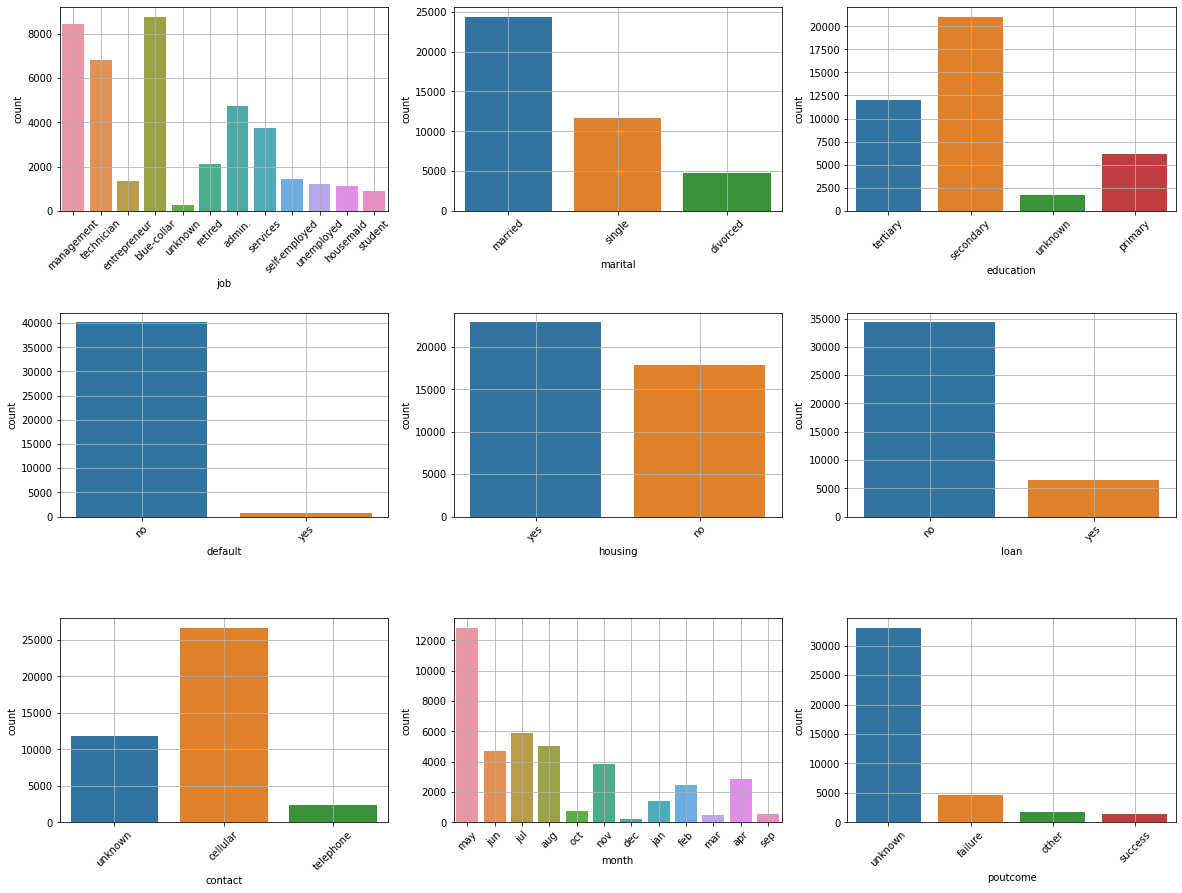

In [61]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
for col,i in zip(category_data.columns, ax.flatten()):
  g = sns.countplot(x=col, data=dataset_train, ax=i)
  g.tick_params(axis="x", rotation=45)
  i.grid(True)
plt.subplots_adjust(hspace=0.5)
plt.show()

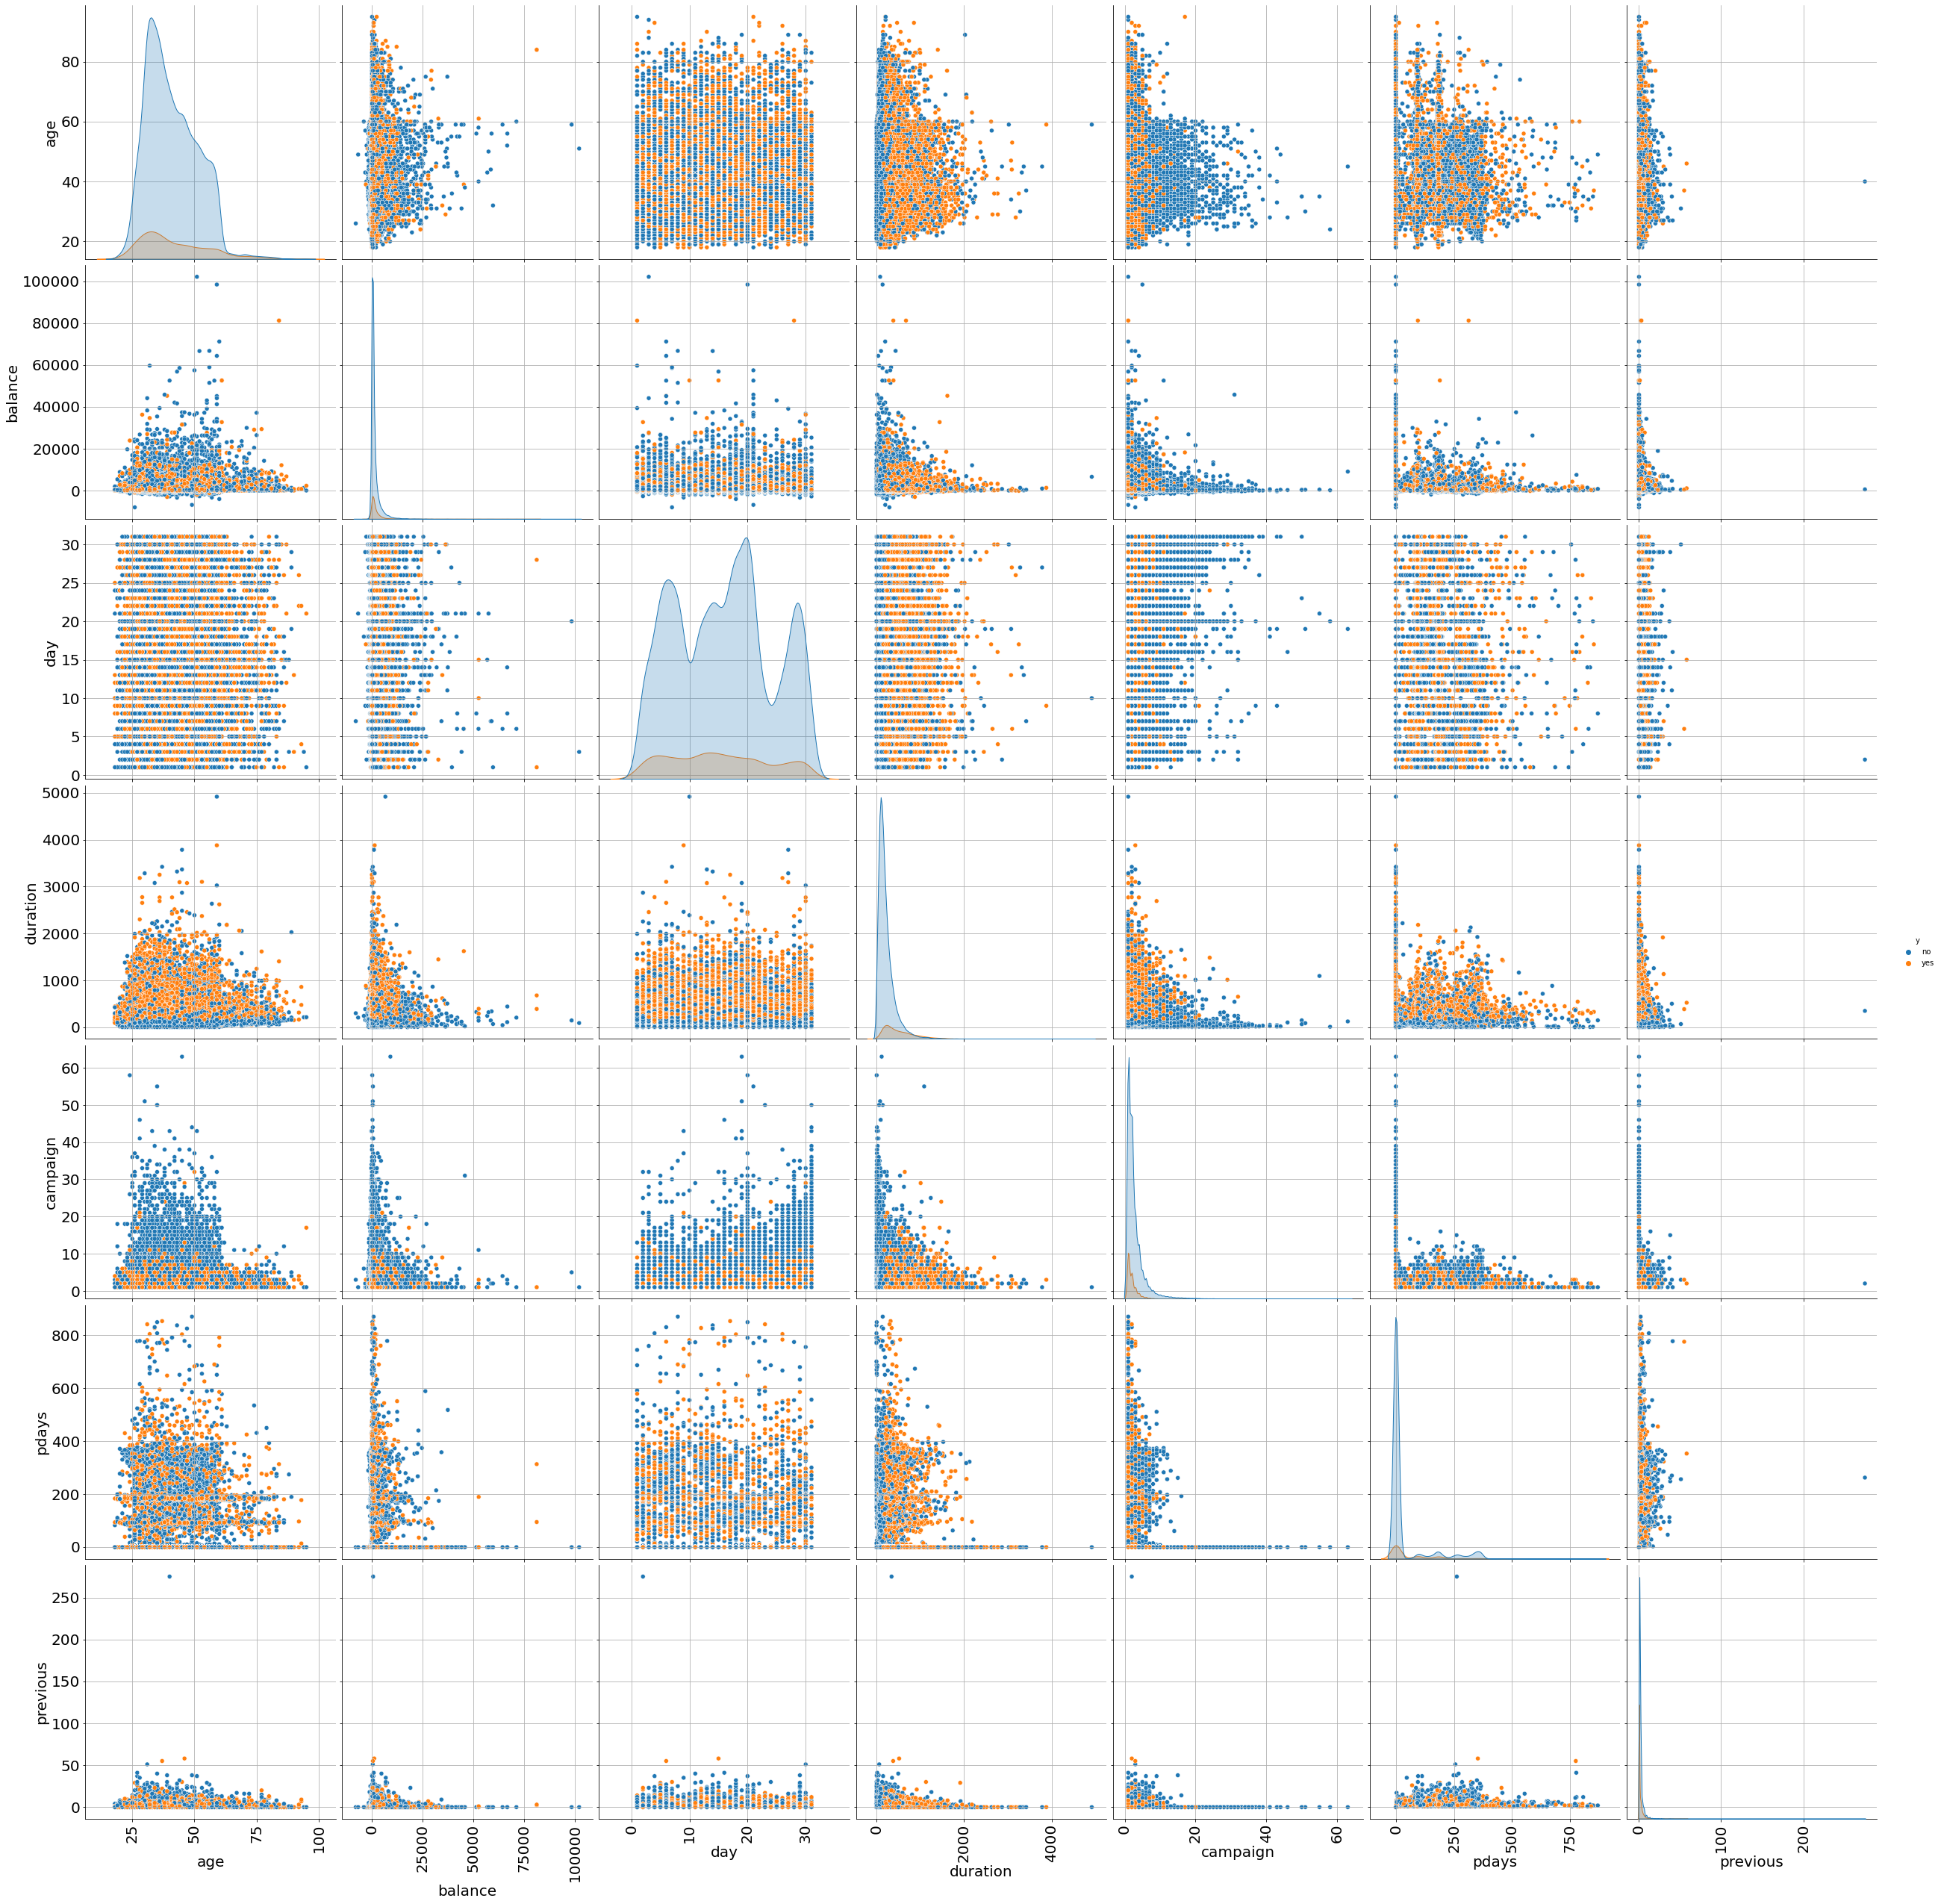

In [62]:
scatter_plot_data = dataset_train_analyst.drop(columns=category_data.columns)
g = sns.pairplot(scatter_plot_data, hue="y", height=5)
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelsize = 20, rotation = 90)
    ax.tick_params(axis="y", labelsize = 20)
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation=90)
    ax.grid(True)
plt.show()

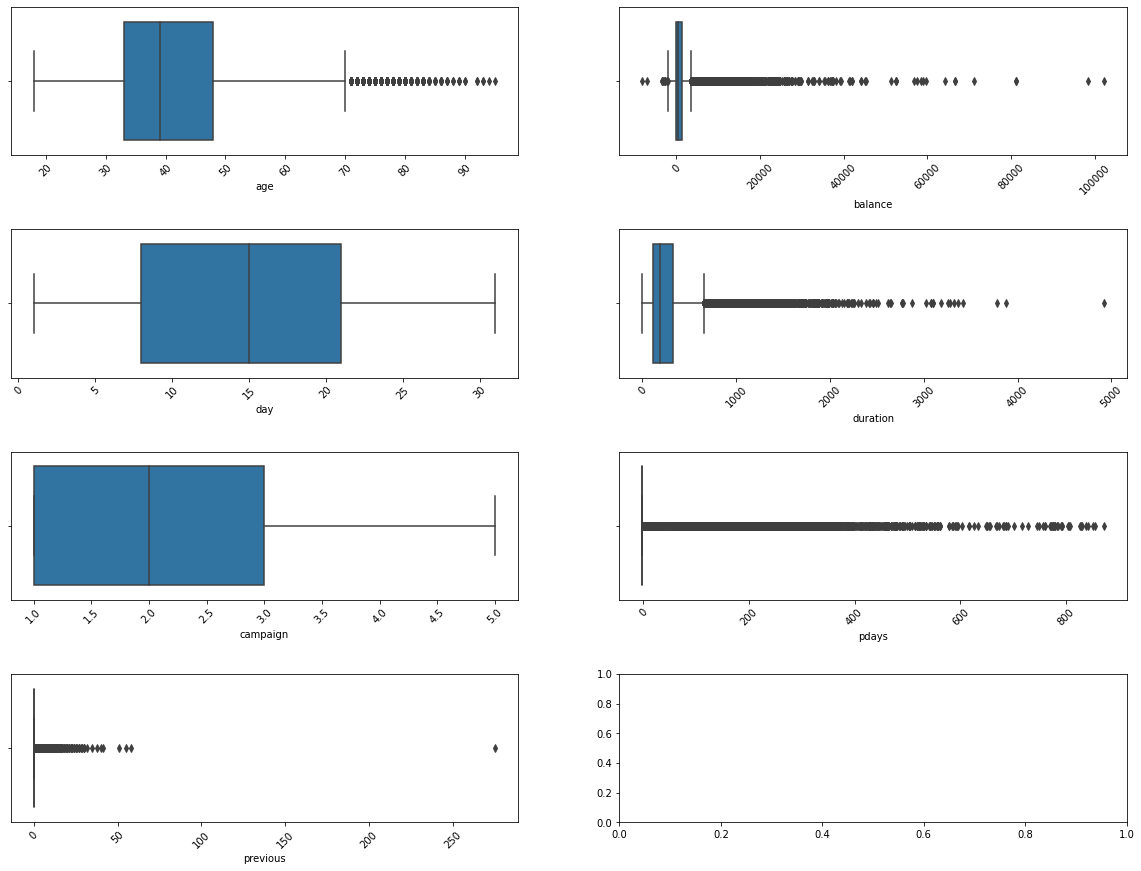

In [63]:
fig, ax = plt.subplots(4, 2, figsize=(20,15))
for col,i in zip(numeric_data.columns, ax.flatten()):
  g = sns.boxplot(x=col, data=dataset_train, ax=i)
  g.tick_params(axis="x", rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.show()

##Function

function split data

In [64]:
def dataframe_split(data, ratio= 0.2, shuffle= 0):
  len_ = int(len(data) - (ratio*len(data)))
  if shuffle == 0 :
    part_  = data.iloc[:int(1 + len_)]
    rest_part_ = data.drop(part_.index)
  elif shuffle == 1:
    part_ = data.sample(frac = 1.0 - ratio)
    rest_part_ = data.drop(part_.index)
  return (part_, rest_part_)

function membuat dataset

In [65]:
def dataframe_to_dataset(data, batch_size=32):
  df = data.copy()
  labels = df.pop('target')
  df = {key:  tf.expand_dims(value,axis=1) for key, value in df.items()}
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [66]:
def dataframe_imbalance_to_dataset(data, batch_size=32, shuffle=32):
  df = data.copy()
  labels = df.pop('target')
  df = {key:  tf.expand_dims(value,axis=1) for key, value in df.items()}
  data = tf.data.Dataset.from_tensor_slices((dict(df), labels)).batch(batch_size)

  no_ds = (data
          .unbatch()
          .filter(lambda features, label: label==0)
          .shuffle(shuffle)
          .repeat())
  yes_ds = (data
            .unbatch()
            .filter(lambda features, label: label==1)
            .shuffle(shuffle)
            .repeat())
  
  ds = tf.data.Dataset.sample_from_datasets([no_ds, yes_ds], weights=[0.5, 0.5])
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

function preprocessing numeric

In [67]:
def numeric_preprocessing(name, dataset, step):
  feature_dataset = dataset.map(lambda x,y: x[name])
  layer = tf.keras.layers.Normalization()
  layer.adapt(feature_dataset, steps=step)

  return layer

In [68]:
def numeric_to_categories_preprocessing(name, dataset, step, num_bins, output_mode="multi_hot"):
  feature_dataset = dataset.map(lambda x,y: x[name])
  layer = tf.keras.layers.Discretization(num_bins=num_bins, epsilon=0.00001)
  layer.adapt(feature_dataset, steps=step)
  
  category_encoding = tf.keras.layers.CategoryEncoding(num_tokens=num_bins, output_mode=output_mode)
  return lambda feature:  category_encoding(layer(feature))

function preprocessing categories

In [69]:
def categories_preprocessing(name, dataset, dtype, step=1, output_mode="multi_hot"):
  if(dtype == "int64"):
    lookup = tf.keras.layers.IntegerLookup()
  else:
    lookup = tf.keras.layers.StringLookup()
  feature_dataset = dataset.map(lambda x,y: x[name])
  lookup.adapt(feature_dataset, steps=step)

  category_encoding = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size(), output_mode=output_mode)
  return lambda feature:  category_encoding(lookup(feature))

plot metric

In [70]:
def plot_metric(x, y, history, metric):
  fig, ax = plt.subplots(x, y, figsize=(15,10))
  epochs = range(len(history.history[metric[0]]))
  for metric, ax in zip(metric, ax.flatten()):
    ax.plot(epochs, history.history[metric], 'r', label='train')
    ax.plot(epochs, history.history['val_'+metric], 'b', ls="--", label='val')
    ax.set_ylabel(metric)
    ax.set_xlabel('epoch')
    ax.legend()  
  plt.show()

plot confution matrix

In [101]:
def plot_confution_matrix(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Tidak Berlangganan dengan Prediksi yang tepat (True Negatives): ', cm[0][0])
  print('Tidak Berlangganan dengan Prediksi yang salah (False Negatives): ', cm[0][1])
  print('Berlangganan dengan Prediksi yang salah (False Positives): ', cm[1][0])
  print('Berlangganan dengan Prediksi yang tepat (True Positives): ', cm[1][1])
  print('Total: ', np.sum(cm[1]))

##Data Preparation

mengubah column y, dengan nilai 0 menunjukan *NO* dan nilai 1 menunjukan *YES*

In [72]:
dataset_train['target'] = dataset_train.loc[:, 'y'].apply(lambda x : 0 if x == "no" else 1)

dataset_train.drop(columns=["duration", "day", "month", "contact", "y"], inplace=True)

In [73]:
dataset_test['target'] = dataset_test.loc[:, 'y'].apply(lambda x : 0 if x == "no" else 1)

dataset_test.drop(columns=["duration", "day", "month", "contact", "y"], inplace=True)

dataset train ini merupakan dataframe pandas, split data train dengan ratio 80:20 . 20 % untuk validasi

In [74]:
train, val = dataframe_split(dataset_train, ratio = 0.3, shuffle=1)

In [75]:
print(len(train), 'training examples')
print(len(val), 'validation examples')

28599 training examples
12257 validation examples


##Data Preprocessing

membuat dataset

In [76]:
batch_size = 512
step = 128

train_ds = dataframe_imbalance_to_dataset(train, batch_size=batch_size)
val_ds = dataframe_imbalance_to_dataset(val, batch_size=batch_size)
test_ds = dataframe_to_dataset(dataset_test, batch_size=batch_size)

cek data

In [77]:
for features, labels in train_ds.take(1):
  print(labels.numpy())

[0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1
 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1
 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1
 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0
 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1
 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1
 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 1 1 0 

membagikan column berdasarkan numeric atau categorical integer atau string

In [78]:
bins= [5, 4, 1, 1]
num_to_categorical_keys = ["balance", "campaign", "pdays", "previous", ]
num_keys = ["age"]
categorical_string_keys = ["job", "marital", "education", "poutcome"]
binary_string_keys = ["housing", "loan", "default"]
all_inputs = []
all_preprocessors = []

In [79]:
for categorical in binary_string_keys:
  input = tf.keras.Input(shape=(1,), name=categorical, dtype="string")
  cat_layer = categories_preprocessing(name=categorical, dataset=train_ds, dtype="string", step=step, output_mode="one_hot")
  cat_preprocessor = cat_layer(input)
  all_inputs.append(input)
  all_preprocessors.append(cat_preprocessor)

In [80]:
for categorical in categorical_string_keys:
  input = tf.keras.Input(shape=(1,), name=categorical, dtype="string")
  cat_layer = categories_preprocessing(name=categorical, dataset=train_ds, dtype="string", step=step, output_mode="one_hot")
  cat_preprocessor = cat_layer(input)
  all_inputs.append(input)
  all_preprocessors.append(cat_preprocessor)

In [81]:
for num_cat, bin in zip(num_to_categorical_keys, bins):
  input = tf.keras.Input(shape=(1,), name=num_cat, dtype="int64")
  num_cat_layer = numeric_to_categories_preprocessing(name=num_cat, dataset=train_ds, step=step, num_bins=bin, output_mode="one_hot")
  num_cat_preprocessor = num_cat_layer(input)
  all_inputs.append(input)
  all_preprocessors.append(num_cat_preprocessor)

In [82]:
for num_cat, bin in zip(num_keys, bins):
  input = tf.keras.Input(shape=(1,), name=num_cat, dtype="int64")
  num_layer = numeric_preprocessing(name=num_cat, dataset=train_ds, step=step)
  num_preprocessor = num_layer(input)
  all_inputs.append(input)
  all_preprocessors.append(num_preprocessor)

In [83]:
all_inputs, all_preprocessors

([<KerasTensor: shape=(None, 1) dtype=string (created by layer 'housing')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'loan')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'default')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'job')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'marital')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'education')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'poutcome')>,
  <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'balance')>,
  <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'campaign')>,
  <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'pdays')>,
  <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'previous')>,
  <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'age')>],
 [<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_11')>,
  <KerasTe

##Model

In [84]:
all_features = tf.keras.layers.concatenate(all_preprocessors)
x = tf.keras.layers.Dense(16, activation=tf.keras.activations.relu, kernel_regularizer=tf.keras.regularizers.L2(0.00000001))(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(16, activation=tf.keras.activations.relu, kernel_regularizer=tf.keras.regularizers.L2(0.00000001))(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(16, activation=tf.keras.activations.relu, kernel_regularizer=tf.keras.regularizers.L2(0.00000001))(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)(x)

model = tf.keras.Model(all_inputs, output)

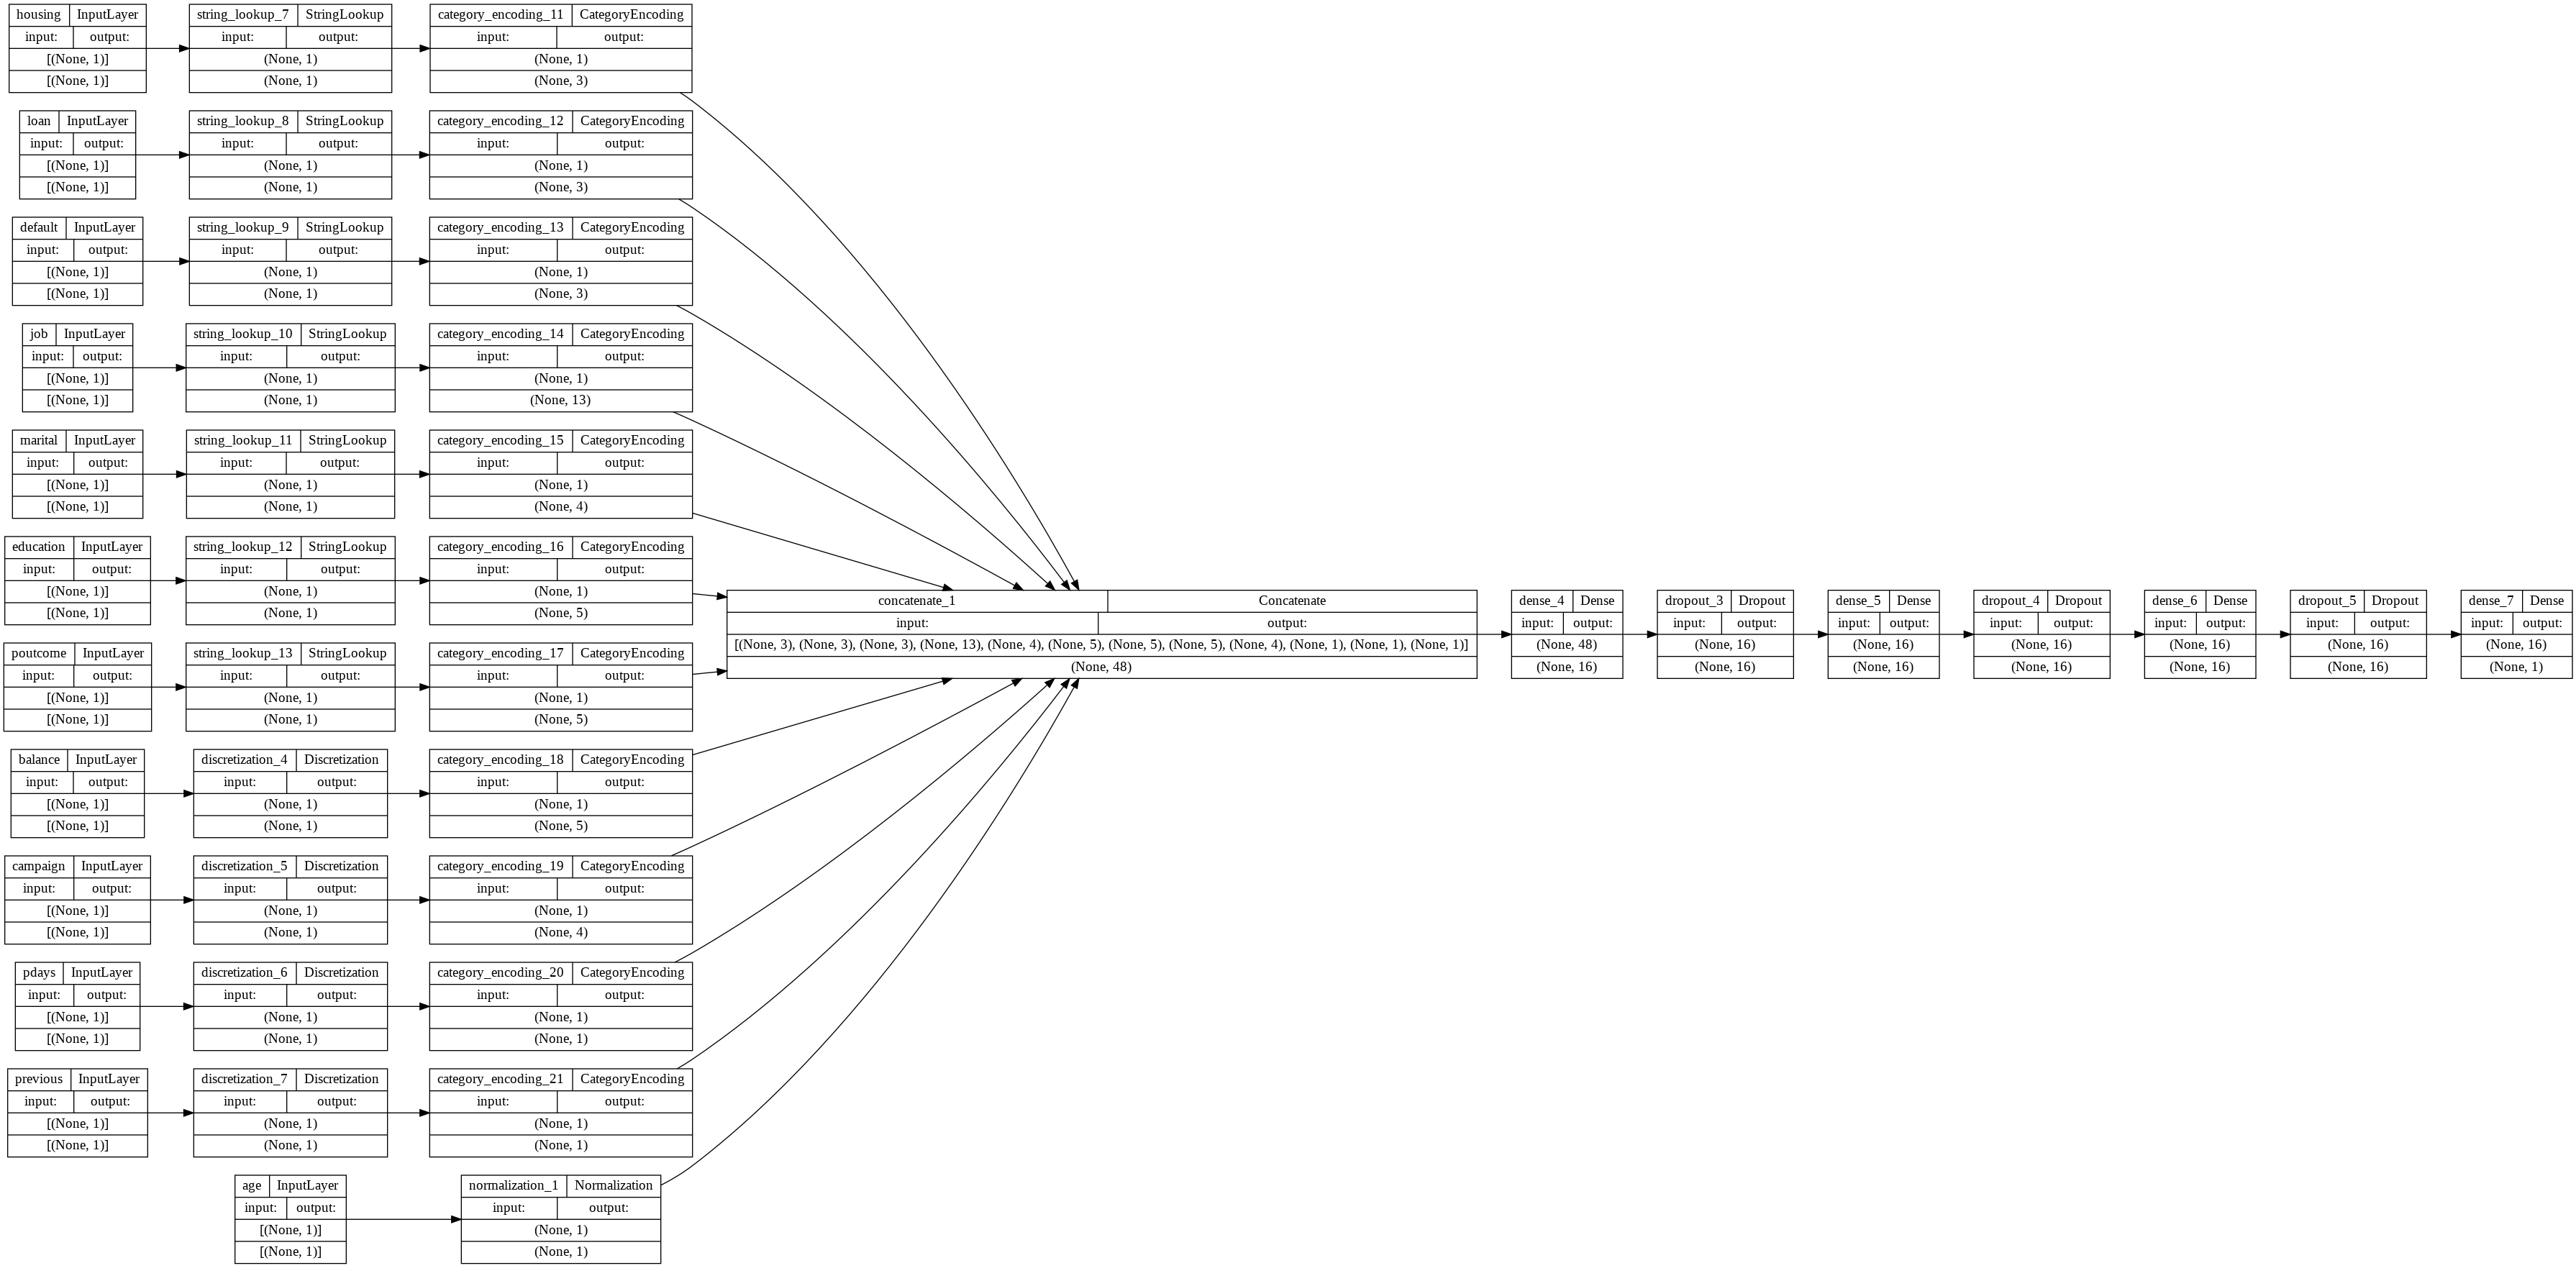

In [85]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [86]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.SensitivityAtSpecificity(0.5, name='specificity'),

]
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

In [87]:
loss = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, restore_best_weights=True)
val_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history = model.fit(train_ds, epochs=100, validation_data=val_ds, validation_steps=32, callbacks=[loss, val_loss], steps_per_epoch=32)

Epoch 1/100
32/32 [==============================] - 10s 246ms/step - loss: 0.7190 - tp: 4508.0000 - fp: 4426.0000 - tn: 3820.0000 - fn: 3630.0000 - accuracy: 0.5083 - precision: 0.5046 - recall: 0.5539 - specificity: 0.5131 - val_loss: 0.6881 - val_tp: 2992.0000 - val_fp: 1914.0000 - val_tn: 6224.0000 - val_fn: 5254.0000 - val_accuracy: 0.5625 - val_precision: 0.6099 - val_recall: 0.3628 - val_specificity: 0.5501
Epoch 2/100
32/32 [==============================] - 7s 213ms/step - loss: 0.6957 - tp: 3241.0000 - fp: 2977.0000 - tn: 5193.0000 - fn: 4973.0000 - accuracy: 0.5148 - precision: 0.5212 - recall: 0.3946 - specificity: 0.4928 - val_loss: 0.6874 - val_tp: 2233.0000 - val_fp: 1106.0000 - val_tn: 7025.0000 - val_fn: 6020.0000 - val_accuracy: 0.5651 - val_precision: 0.6688 - val_recall: 0.2706 - val_specificity: 0.6424
Epoch 3/100
32/32 [==============================] - 7s 238ms/step - loss: 0.6934 - tp: 3062.0000 - fp: 2773.0000 - tn: 5484.0000 - fn: 5065.0000 - accuracy: 0.5216 

##Model Evaluation

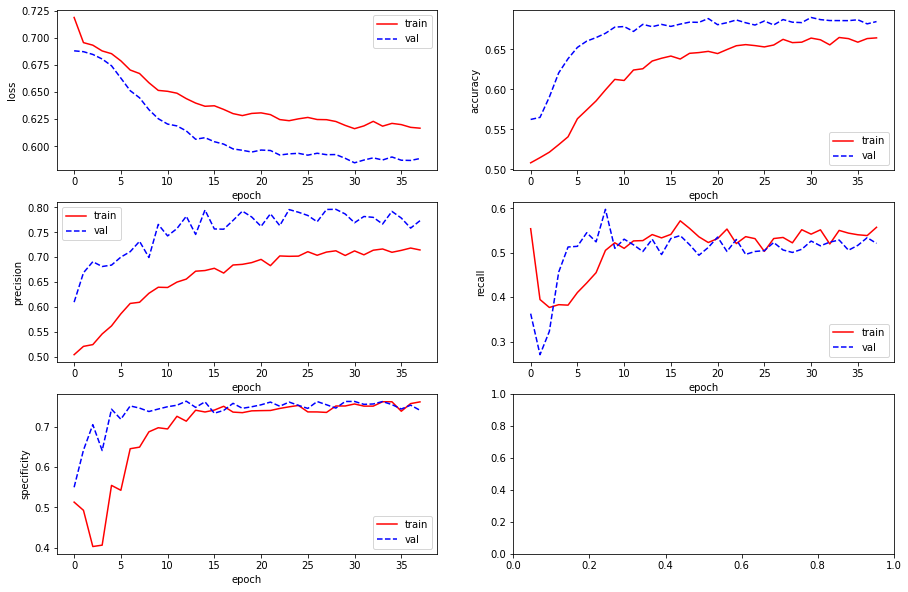

In [88]:
metric = ['loss', 'accuracy', 'precision', 'recall', 'specificity']
plot_metric(3,2, history, metric)

In [89]:
predict_test = model.predict(test_ds)
test_ds_unbach = test_ds.unbatch()
label_test = [i[1] for i in list(test_ds_unbach.as_numpy_iterator())]

**Accuracy**

Merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data. Akurasi menjawab pertanyaan “Berapa persen konsumen yang benar diprediksi berlanggana dan Tidak berlangganan dari kesuluruhan konsumen”

Akurasi = **(TP + TN ) / (TP+FP+FN+TN)**

**Precission**

Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf. Precission menjawab pertanyaan “Berapa persen konsumen yang benar berlangganan dari keseluruhan mahasiswa yang diprediksi berlangganan?”

Precission = **(TP) / (TP+FP)**

**Recall (Sensitifitas)**

Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Recall menjawab pertanyaan “Berapa persen konsumen yang diprediksi berlangganan dibandingkan keseluruhan konsumen yang sebenarnya berlangganan”.

Recall = **(TP) / (TP + FN)**


**Specificity**

Merupakan kebenaran memprediksi negatif dibandingkan dengan keseluruhan data negatif. Specificity menjawab pertanyaan “Berapa persen konsumen yang benar diprediksi tidak berlangganan dibandingkan dengan keseluruhan konsumen yang sebenarnya tidak berlangganan”.

Specificity = **(TN)/ (TN + FP)**

**Sumber**:

 [mengenal accuracy, precission, recall,specificity](https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124)

9/9 [==============================] - 0s 11ms/step - loss: 0.6070 - tp: 259.0000 - fp: 756.0000 - tn: 3244.0000 - fn: 262.0000 - accuracy: 0.7748 - precision: 0.2552 - recall: 0.4971 - specificity: 0.7409
loss :  0.6070201396942139
tp :  259.0
fp :  756.0
tn :  3244.0
fn :  262.0
accuracy :  0.7748285531997681
precision :  0.25517240166664124
recall :  0.4971209168434143
specificity :  0.740882933139801
Tidak Berlangganan dengan Prediksi yang tepat (True Negatives):  3244
Tidak Berlangganan dengan Prediksi yang salah (False Positives):  756
Berlangganan dengan Prediksi yang salah (False Negatives):  262
Berlangganan dengan Prediksi yang tepat (True Positives):  259
Total:  521


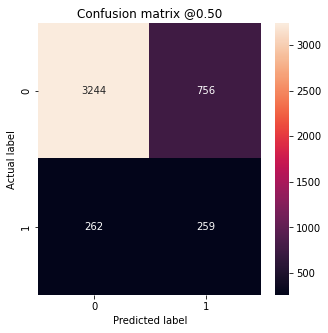

In [99]:
model_evaluate = model.evaluate(test_ds)
for name_metric, value_evaluate in zip(model.metrics_names, model_evaluate):
  print(name_metric, ': ', value_evaluate)

plot_confution_matrix(label_test, predict_test)

Dari 4521 pelanggan, 2640 nya berhasil diprediksi tidak akan berlangganan. Dengan begitu, dengan menggunakan model ini kita dapat mengurangi jumlah kampanye sebesar 11% (karena tim marketing tidak perlu mendatangi 529 orang tsb).

Dari 512 pelanggan yang sebenarnya berlangganan, 19 nya diprediksi tidak akan berlangganan. Dengan begitu, bank kehilangan sekitar 4% pelanggan.


Tidak Berlangganan dengan Prediksi yang tepat (True Negatives):  139
Tidak Berlangganan dengan Prediksi yang salah (False Negatives):  3861
Berlangganan dengan Prediksi yang salah (False Positives):  4
Berlangganan dengan Prediksi yang tepat (True Positives):  517
Total:  521


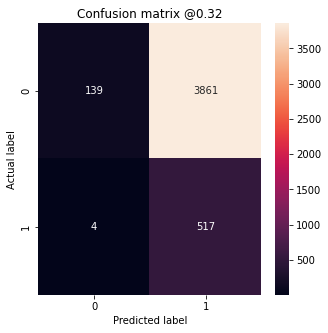

In [105]:
plot_confution_matrix(label_test, predict_test, p=0.32)

Dari 4521 pelanggan, 529 nya berhasil diprediksi tidak akan berlangganan. Dengan begitu, dengan menggunakan model ini kita dapat mengurangi jumlah kampanye sebesar 11% (karena tim marketing tidak perlu mendatangi 529 orang tsb).

Dari 512 pelanggan yang sebenarnya berlangganan, 19 nya diprediksi tidak akan berlangganan. Dengan begitu, bank kehilangan sekitar 4% pelanggan.
.

In [103]:
dataset_test.sort_values(by=["target"], ascending=True).head()

,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,1,-1,0,unknown,0
2906,34,management,single,tertiary,no,0,no,no,2,-1,0,unknown,0
2907,44,technician,married,tertiary,no,1707,no,no,3,-1,0,unknown,0
2908,35,technician,married,secondary,no,13658,yes,no,2,-1,0,unknown,0
2909,39,admin.,married,secondary,no,406,no,no,5,-1,0,unknown,0


##Simulation

In [104]:
sample = {
    'age': 51,
    'job': 'retired',
    'marital': 'divorced',
    'education': 'secondary',
    'balance': 1679,
    'housing': 'no',
    'loan': 'no',
    'default': 'no',
    'campaign': 1,
    'pdays': 365,
    'previous': 9,
    'poutcome': 'other'
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(
    f"Probabilitas untuk berlangganan deposito berjangka adalah {round(100 * predictions[0][0], 2)} % "
    f"untuk setuju "
    f"{predictions}"
)

Probabilitas untuk berlangganan deposito berjangka adalah 76.9 % untuk setuju [[0.76897305]]


##Kesimpulan
Dengan menggunakan model ini, bank dapat mengurangi beban pemasaran meskipun ada sedikit kerugian (karena ada potensi pelanggan yang benar-benar berlangganan salah diprediksi menjadi tidak berlangganan). Untuk pengembangan kedepannya, model ini masih dapat ditingkatkan supaya bisa semakin membantu pemasaran untuk bisa melakukan kampanye lebih efektif lagi.